In [1]:
import numpy as np
from matplotlib import pyplot as plt
import keras
import cv2 as cv


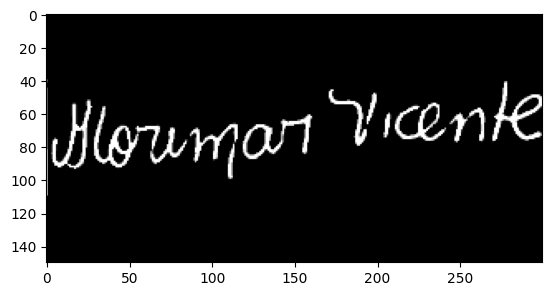

(150, 300, 3)


In [2]:
file_name = "funal.png"
img = cv.imread(file_name)

plt.imshow(img)
plt.show()

print(np.shape(img))

In [3]:
def vectorized_result(j, n):
    e = np.zeros((n))
    e[j - 1] = 1.0
    return e

def load_data():
    train_data = []
    train_labels = []
    n = 10 #23
    m = 20 #24
    for i in range(1, n + 1):
        for j in range(1, m + 1):
            # Открытие файла
            file_name = "../DATA/new_data/{0}/original_{1}_{2}.png".format(i, i, j)
            img = cv.imread(file_name) #, cv.IMREAD_GRAYSCALE
            # img = cv.cvtColor(img, cv.GRAYSCALE2RGB)
            # img = np.reshape(img, (-1, 1))
            img = img.astype("float32")
            train_data.append(img)
            train_labels.append(vectorized_result(i, n))
    
    return (train_data, train_labels)
  

data, labels = load_data()
train_data = np.array(data)
train_labels = np.array(labels)

print(train_data.shape)
print(train_labels.shape)

(200, 150, 300, 3)
(200, 10)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 298, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 99, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 97, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 48, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 35328)             0         
                                                                 
 dense (Dense)               (None, 128)               4

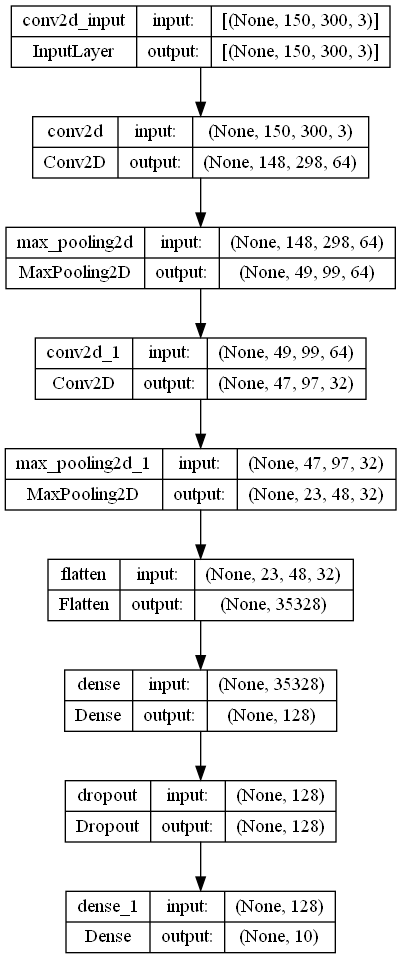

In [4]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from keras.optimizers import Adam
from keras.utils.vis_utils import plot_model

network = Sequential()

network.add(Conv2D(64,(3,3),input_shape=(150, 300, 3),activation='relu'))
network.add(MaxPooling2D(3,3))
network.add(Conv2D(32,(3,3),activation='relu'))
network.add(MaxPooling2D(2,2))
network.add(Flatten())
network.add(Dense(128,activation = 'relu'))
network.add(Dropout(rate=0.3))
network.add(Dense(10,activation = 'softmax'))

network.compile(optimizer=Adam(learning_rate = 0.001),loss="binary_crossentropy",metrics=["accuracy"])
network.summary()


plot_model(network, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [5]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau, TensorBoard
earlyStopping = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=3,
                              verbose=1)

callback_early_stop_reduceLROnPlateau=[earlyStopping]


EPOCHS = 5
BS = 1
progess = network.fit(train_data, train_labels, 
                      batch_size=BS,
                      epochs=EPOCHS, 
                      callbacks=callback_early_stop_reduceLROnPlateau,
                      validation_split=.05)

Epoch 1/5
190/190 [==============================] - 37s 187ms/step - loss: 1.0817 - accuracy: 0.5632 - val_loss: 0.2393 - val_accuracy: 0.6000
Epoch 2/5
190/190 [==============================] - 35s 185ms/step - loss: 0.1154 - accuracy: 0.9105 - val_loss: 0.2591 - val_accuracy: 0.7000
Epoch 3/5
190/190 [==============================] - 35s 183ms/step - loss: 0.0645 - accuracy: 0.9526 - val_loss: 0.0640 - val_accuracy: 0.9000
Epoch 4/5
190/190 [==============================] - 35s 184ms/step - loss: 0.0500 - accuracy: 0.9737 - val_loss: 0.2827 - val_accuracy: 0.7000
Epoch 5/5
190/190 [==============================] - 35s 186ms/step - loss: 0.0381 - accuracy: 0.9947 - val_loss: 0.2877 - val_accuracy: 0.9000


In [6]:

data = []
labels = []
y = []
n = 10 #23
for i in range(1, n + 1):
    for j in range(21, 25):
        # Открытие файла
        file_name = "../DATA/new_data/{0}/original_{1}_{2}.png".format(i, i, j)
        img = cv.imread(file_name) #, cv.IMREAD_GRAYSCALE
        # img = cv.cvtColor(img, cv.GRAYSCALE2RGB)
        # img = np.reshape(img, (-1, 1))
        img = img.astype("float32")
        data.append(img)
        y.append(i-1)
        labels.append(vectorized_result(i, n))  

test_data = np.array(data)
test_labels = np.array(labels)

print(test_data.shape)
print(test_labels.shape)

(40, 150, 300, 3)
(40, 10)


In [7]:
pred = network.predict(test_data)

2/2 [==============================] - 1s 230ms/step


In [10]:
print(pred.argmax(axis=1))
print(y)

[0 0 0 0 1 1 1 1 2 4 2 1 3 3 3 3 4 4 4 4 5 5 5 5 6 6 6 6 7 7 7 7 8 8 7 8 9
 9 9 9]
[0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6, 7, 7, 7, 7, 8, 8, 8, 8, 9, 9, 9, 9]


In [11]:
from sklearn.metrics import accuracy_score

accuracy_score(pred.argmax(axis=1), y)

0.925